In [51]:
__author__ = "Miguel Solinas "
__credits__ = "Miguel Solinas "
__version__ = "0.1.0"
__maintainer__ = "Miguel Solinas"
__status__ = "Project"

In [52]:
#importing libraries
import pandas as pd
import numpy as np

In [53]:
#open dataset
file = pd.read_csv("balanced.csv")
dataset = pd.DataFrame(file)

dataset.dtypes

type           int64
time         float64
sender         int64
messageID      int64
pos/0        float64
pos/1        float64
pos/2        float64
spd/0        float64
spd/1        float64
classs         int64
dtype: object

In [54]:

dataset.classs[dataset.classs==1]=0
dataset.classs[dataset.classs==5]=1
dataset.to_csv("dataset.csv")
dataset.describe()

C:\Users\Maturrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Maturrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,type,time,sender,messageID,pos/0,pos/1,pos/2,spd/0,spd/1,classs
count,4022.0,4022.000000,4022.000000,4022.000000,4022.000000,4022.000000,4.022000e+03,4.022000e+03,4022.000000,4022.000000
mean,4.0,18050.035089,236.767777,134710.081800,4720.934095,5570.697441,1.895000e+00,1.792124e+00,-1.065055,0.500249
std,0.0,28.799422,151.443348,75747.760579,1088.836688,258.273936,1.929808e-13,8.142110e+00,18.025064,0.500062
min,4.0,18000.006320,7.000000,153.000000,2331.525684,5180.414955,1.895000e+00,-1.712646e+01,-43.866935,0.000000
25%,4.0,18024.759383,103.000000,70581.500000,3614.049260,5313.817688,1.895000e+00,-1.812654e+00,-6.191218,0.000000
50%,4.0,18049.690630,217.000000,138139.000000,4430.766675,5563.903104,1.895000e+00,8.520000e-15,0.000000,1.000000
75%,4.0,18074.763837,361.000000,201741.750000,5933.080115,5778.448693,1.895000e+00,5.595826e+00,2.191666,1.000000
max,4.0,18099.972010,601.000000,260624.000000,6324.850321,6079.772349,1.895000e+00,3.686033e+01,41.421776,1.000000


 1) Some of the featues do not deliver major information

 2) The feature type is usefull, it contains just one value (4)

 3) Pos/2 is not correlated to any feature and it does not change along the samples it is always close to one value
 
 4) I can not ensure if there is a correlation between the feature class and the rest ot the features 

 5) Dataset not well balanced clas1 =  2010 class2 = 2012


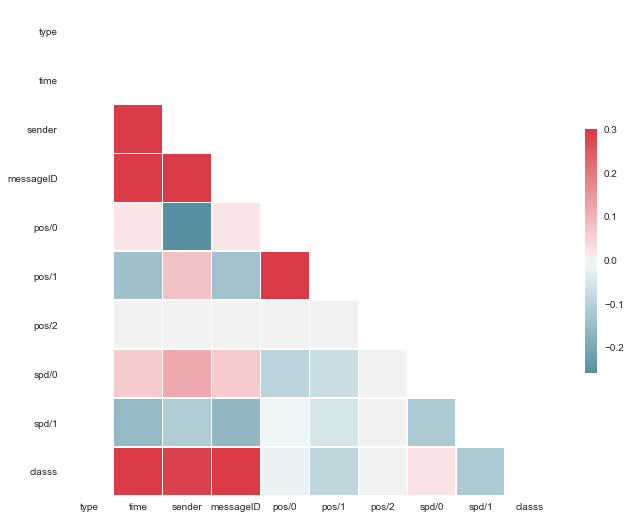

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




print(" 1) Some of the featues do not deliver major information\n") 
print(" 2) The feature type is usefull, it contains just one value (4)\n")
print(" 3) Pos/2 is not correlated to any feature and it does not change along the samples it is always close to one value\n ")
print(" 4) I can not ensure if there is a correlation between the feature class and the rest ot the features \n")
print(" 5) Dataset not well balanced clas1 = ", np.count_nonzero(dataset.classs==0), "class2 =",np.count_nonzero(dataset.classs==1))

In [56]:
import dataset_setup as ds
import model_nn as model
import tensorflow as tf

tf.reset_default_graph()
features= [ 'type', 'sender', 'messageID', 'pos/2','spd/0', 'spd/1', 'pos/2']
targets= ['classs']
dataset = ds.dataset_setup(features,targets)
dataset.input_data("balanced.csv")
new_model = model.model_nn( dataset, 1000, 128,0.001, [len(features),20,2])
new_model.train()



Training samples  (3043, 10) 
Validation samples (320, 10) 
Testing samples (659, 10)


C:\Users\Maturrin\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


num_epochs n° 0 accuracy VALIDATION 0.84210527
num_epochs n° 0 accuracy TESTING 0.8597561
Loss  3435.0203
Loss  23.830288
num_epochs n° 100 accuracy VALIDATION 0.4163272
num_epochs n° 100 accuracy TESTING 0.40238327
Loss  18.390287
Loss  8.106061
num_epochs n° 200 accuracy VALIDATION 0.84210527
num_epochs n° 200 accuracy TESTING 0.8597561
Loss  22.569082
Loss  158.72023
num_epochs n° 300 accuracy VALIDATION 0.84210527
num_epochs n° 300 accuracy TESTING 0.85865927
Loss  22.436306
Loss  29.021854
num_epochs n° 400 accuracy VALIDATION 0.84210527
num_epochs n° 400 accuracy TESTING 0.8597561
Loss  76.55388
Loss  118.5726
num_epochs n° 500 accuracy VALIDATION 0.84210527
num_epochs n° 500 accuracy TESTING 0.8597561
Loss  46.653275
Loss  48.84092
num_epochs n° 600 accuracy VALIDATION 0.66628647
num_epochs n° 600 accuracy TESTING 0.69523346
Loss  4.214674
Loss  151.68037
num_epochs n° 700 accuracy VALIDATION 0.53071535
num_epochs n° 700 accuracy TESTING 0.55264723
Loss  5.4359646
Loss  44.50401